In [29]:
import json
import matplotlib.pyplot as plt


In [ ]:

def parse_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"Файл {file_path} не найден.")
    except json.JSONDecodeError as e:
        print(f"Ошибка при разборе JSON: {e}")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


if __name__ == "__main__":
    file_path = "../fed_env/results/metrics_iid.json"
    parsed_data = parse_json_file(file_path)
    if parsed_data is not None:
        print(parsed_data)

In [28]:
roc_auc_vals = [x["roc_auc_val"] for x in parsed_data["fed_avg"][0] if "roc_auc_val" in x]
accuracy_vals = [x["accuracy_val"] for x in parsed_data["fed_avg"][0] if "accuracy_val" in x]

print("roc_auc_vals:", roc_auc_vals,"\n","accuracy_vals:",accuracy_vals)


roc_auc_vals: [0.7738139507574275, 0.7814787450581282, 0.7841184874936391, 0.7896279406583945, 0.7876854425177126, 0.7868389634790778, 0.7906799232786629, 0.7913355775629233, 0.7925930637648257, 0.7907459780013308, 0.7931655380279484, 0.7935227228245977, 0.7915655458566564, 0.7931410733158493, 0.7914725799506792, 0.7930970368340705, 0.7937282264062316, 0.7939386229302855, 0.7946823501781031, 0.7938848005636671, 0.7961551258464792, 0.794951462011195, 0.7955092574470584, 0.7960328022859827, 0.7955777586409364, 0.7951276079383098, 0.7954798997925393, 0.7955973304106158, 0.7954701139076996, 0.7966590989157241, 0.7943985595177516, 0.7951471797079893, 0.7950542138020119, 0.7946970290053627, 0.7962823423493952, 0.7964780600461894, 0.7946383136963244, 0.7950933573413709, 0.7948633890476378, 0.7966003836066857] 
 accuracy_vals: [0.6594594594594595, 0.6713513513513514, 0.6497297297297298, 0.6924324324324325, 0.6675675675675675, 0.6524324324324324, 0.6508108108108108, 0.632972972972973, 0.6902702

In [22]:
roc_auc_vals.append(parsed_data["fed_avg"][0][-1]["roc_auc_test"])
accuracy_vals.append(parsed_data["fed_avg"][0][-1]["accuracy_test"])

In [32]:
roc_auc_vals
accuracy_vals

[0.6594594594594595,
 0.6713513513513514,
 0.6497297297297298,
 0.6924324324324325,
 0.6675675675675675,
 0.6524324324324324,
 0.6508108108108108,
 0.632972972972973,
 0.6902702702702703,
 0.667027027027027,
 0.6810810810810811,
 0.6708108108108108,
 0.6897297297297297,
 0.7021621621621622,
 0.6551351351351351,
 0.6735135135135135,
 0.6837837837837838,
 0.6562162162162162,
 0.6718918918918919,
 0.68,
 0.687027027027027,
 0.6816216216216217,
 0.6886486486486486,
 0.6875675675675675,
 0.6886486486486486,
 0.6648648648648648,
 0.7237837837837838,
 0.72,
 0.6859459459459459,
 0.6772972972972973,
 0.6718918918918919,
 0.7372972972972973,
 0.7032432432432433,
 0.6924324324324325,
 0.6978378378378378,
 0.7091891891891892,
 0.6908108108108109,
 0.6837837837837838,
 0.725945945945946,
 0.705945945945946]

In [50]:

def plot_metrics(roc_auc_vals, accuracy_vals):
    rounds = range(1, len(roc_auc_vals) + 1)
    plt.figure(figsize=(6, 4))
    plt.plot(rounds, roc_auc_vals, label="ROC AUC", linestyle="-", color="blue")
    plt.plot(rounds, accuracy_vals, label="Accuracy", linestyle="--", color="green")
    # plt.scatter(len(roc_auc_vals), roc_auc_vals[-1], color="red", s=100, label="Test Set ROC AUC", edgecolors="black", zorder=5)
    # plt.scatter(len(accuracy_vals), accuracy_vals[-1], color="orange", s=100, label="Test Set Accuracy", edgecolors="black", zorder=5)
    plt.title("ROC_AUC & Accuracy", fontsize=16)
    plt.xlabel("Rounds", fontsize=12)
    plt.ylim(0.3, 0.9)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()

    plt.show()

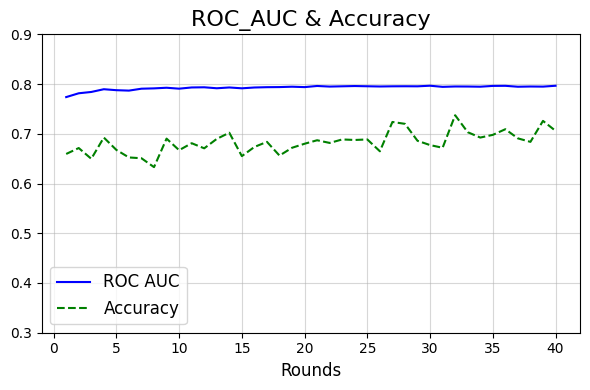

In [51]:
plot_metrics(roc_auc_vals, accuracy_vals)